In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


> # **Read the datasets**

In [2]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

> # **Feature Engineering**

## Drop the column where missing value greater then 1000

In [3]:
train_data = train_data.drop(train_data.columns[train_data.isna().sum() > 1000], axis = 1)
train_data.shape

(1460, 77)

In [4]:
test_data = test_data.drop(test_data.columns[test_data.isna().sum() > 1000], axis = 1)
test_data.shape

(1459, 76)

## Read train and test data

In [5]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [6]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


## Find number of missing values of train data

In [7]:
missing_train_values = [col for col in train_data.columns if train_data[col].isna().sum() > 0]
for col in missing_train_values:
    print(col, train_data[col].isna().sum(), train_data[col].dtypes)

LotFrontage 259 float64
MasVnrType 8 object
MasVnrArea 8 float64
BsmtQual 37 object
BsmtCond 37 object
BsmtExposure 38 object
BsmtFinType1 37 object
BsmtFinType2 38 object
Electrical 1 object
FireplaceQu 690 object
GarageType 81 object
GarageYrBlt 81 float64
GarageFinish 81 object
GarageQual 81 object
GarageCond 81 object


## Checking skewness of missing columns of train data

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

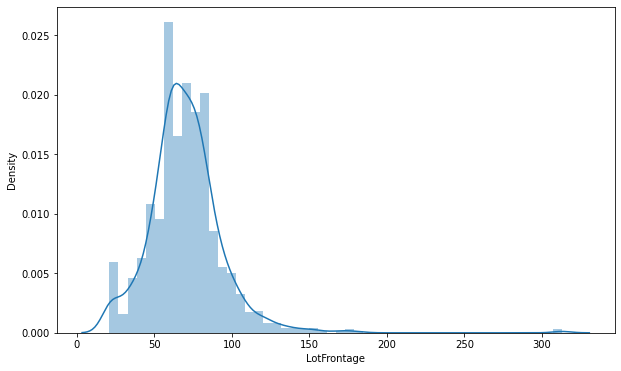

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 6))
sns.distplot(train_data['LotFrontage'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

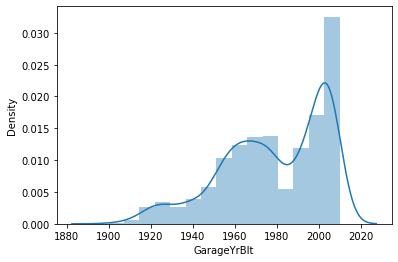

In [9]:
sns.distplot(train_data['GarageYrBlt'])

## Fullfill missing data by median in train dataset

In [10]:
from sklearn.impute import SimpleImputer
imputer_median = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer_median.fit(train_data[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']])
train_data[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']] = imputer_median.transform(train_data[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']])

In [11]:
missing_train_values = [col for col in train_data.columns if train_data[col].isna().sum() > 0]
for col in missing_train_values:
    print(col, train_data[col].isna().sum(), train_data[col].dtypes)

MasVnrType 8 object
BsmtQual 37 object
BsmtCond 37 object
BsmtExposure 38 object
BsmtFinType1 37 object
BsmtFinType2 38 object
Electrical 1 object
FireplaceQu 690 object
GarageType 81 object
GarageFinish 81 object
GarageQual 81 object
GarageCond 81 object


## Drop FireplaceQu column for high missing value on train dataset

In [12]:
train_data = train_data.drop(columns = 'FireplaceQu')

## Fullfill missing categorical data by most frequent value on training dataset 

In [13]:
object_train_data = [col for col in train_data.columns if (train_data[col].dtypes == 'object' and train_data[col].isna().sum() > 0)]
imputer_object = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer_object.fit(train_data[object_train_data])
train_data[object_train_data] = imputer_object.transform(train_data[object_train_data])

### Checking missing values(if any)

In [14]:
train_data.isna().sum().sum()

0

In [15]:
train_data.shape

(1460, 76)

## Find the number of missing data of test data.

In [16]:
missing_test_values = [col for col in test_data.columns if test_data[col].isna().sum() > 0]
for col in missing_test_values:
    print(col, test_data[col].isna().sum(), test_data[col].dtypes)

MSZoning 4 object
LotFrontage 227 float64
Utilities 2 object
Exterior1st 1 object
Exterior2nd 1 object
MasVnrType 16 object
MasVnrArea 15 float64
BsmtQual 44 object
BsmtCond 45 object
BsmtExposure 44 object
BsmtFinType1 42 object
BsmtFinSF1 1 float64
BsmtFinType2 42 object
BsmtFinSF2 1 float64
BsmtUnfSF 1 float64
TotalBsmtSF 1 float64
BsmtFullBath 2 float64
BsmtHalfBath 2 float64
KitchenQual 1 object
Functional 2 object
FireplaceQu 730 object
GarageType 76 object
GarageYrBlt 78 float64
GarageFinish 78 object
GarageCars 1 float64
GarageArea 1 float64
GarageQual 78 object
GarageCond 78 object
SaleType 1 object


## Replacing missing value with mode and median.

In [17]:
float_test_data = [col for col in test_data.columns if (test_data[col].dtypes == 'float64' and test_data[col].isna().sum() > 0)]
imputer_test_median = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer_test_median.fit(test_data[float_test_data])
test_data[float_test_data] = imputer_test_median.transform(test_data[float_test_data])

In [18]:
test_data = test_data.drop(columns = 'FireplaceQu')

In [19]:
object_test_data = [col for col in test_data.columns if (test_data[col].dtypes == 'object' and test_data[col].isna().sum() > 0)]
imputer_test_mode = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer_test_mode.fit(test_data[object_test_data])
test_data[object_test_data] = imputer_test_mode.transform(test_data[object_test_data])

In [20]:
test_data.shape

(1459, 75)

### Checking missing values(if any)

In [21]:
test_data.isna().sum().sum()

0

## Find no of unique categorical data of train data

In [22]:
for i in train_data.columns:
    if train_data[i].dtypes == 'object':
        print(f"{i} : {train_data[i].nunique()}")

MSZoning : 5
Street : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 4
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinType2 : 6
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
KitchenQual : 4
Functional : 7
GarageType : 6
GarageFinish : 3
GarageQual : 5
GarageCond : 5
PavedDrive : 3
SaleType : 9
SaleCondition : 6


In [23]:
NoSeWa = train_data[train_data['Utilities'] != 'AllPub'].index
train_data.drop(NoSeWa, inplace = True)

## Comparison no of categorical variable between train and test data

In [24]:
train_data.groupby('Condition2')['Condition2'].value_counts()

Condition2  Condition2
Artery      Artery           2
Feedr       Feedr            6
Norm        Norm          1444
PosA        PosA             1
PosN        PosN             2
RRAe        RRAe             1
RRAn        RRAn             1
RRNn        RRNn             2
Name: Condition2, dtype: int64

In [25]:
test_data.groupby('Condition2')['Condition2'].value_counts()

Condition2  Condition2
Artery      Artery           3
Feedr       Feedr            7
Norm        Norm          1444
PosA        PosA             3
PosN        PosN             2
Name: Condition2, dtype: int64

In [26]:
D1 = train_data[(train_data['Condition2'] == 'RRAe') | (train_data['Condition2'] == 'RRAn') | (train_data['Condition2'] == 'RRNn')].index
train_data.drop(D1, inplace = True)

In [27]:
train_data.groupby('HouseStyle')['HouseStyle'].value_counts()

HouseStyle  HouseStyle
1.5Fin      1.5Fin        153
1.5Unf      1.5Unf         14
1Story      1Story        723
2.5Fin      2.5Fin          8
2.5Unf      2.5Unf         11
2Story      2Story        445
SFoyer      SFoyer         37
SLvl        SLvl           64
Name: HouseStyle, dtype: int64

In [28]:
test_data.groupby('HouseStyle')['HouseStyle'].value_counts()

HouseStyle  HouseStyle
1.5Fin      1.5Fin        160
1.5Unf      1.5Unf          5
1Story      1Story        745
2.5Unf      2.5Unf         13
2Story      2Story        427
SFoyer      SFoyer         46
SLvl        SLvl           63
Name: HouseStyle, dtype: int64

In [29]:
D2 = train_data[train_data['HouseStyle'] == '2.5Fin'].index
train_data.drop(D2, inplace = True)

In [30]:
train_data.groupby('RoofMatl')['RoofMatl'].value_counts()

RoofMatl  RoofMatl
ClyTile   ClyTile        1
CompShg   CompShg     1422
Membran   Membran        1
Metal     Metal          1
Roll      Roll           1
Tar&Grv   Tar&Grv       11
WdShake   WdShake        5
WdShngl   WdShngl        5
Name: RoofMatl, dtype: int64

In [31]:
test_data.groupby('RoofMatl')['RoofMatl'].value_counts()

RoofMatl  RoofMatl
CompShg   CompShg     1442
Tar&Grv   Tar&Grv       12
WdShake   WdShake        4
WdShngl   WdShngl        1
Name: RoofMatl, dtype: int64

In [32]:
D3 = train_data[(train_data['RoofMatl'] == 'ClyTile') | (train_data['RoofMatl'] == 'Membran') | (train_data['RoofMatl'] == 'Metal') | (train_data['RoofMatl'] == 'Roll')].index
train_data.drop(D3, inplace = True)

In [33]:
train_data.groupby('Exterior1st')['Exterior1st'].value_counts()

Exterior1st  Exterior1st
AsbShng      AsbShng         19
AsphShn      AsphShn          1
BrkComm      BrkComm          2
BrkFace      BrkFace         50
CBlock       CBlock           1
CemntBd      CemntBd         60
HdBoard      HdBoard        221
ImStucc      ImStucc          1
MetalSd      MetalSd        217
Plywood      Plywood        105
Stone        Stone            2
Stucco       Stucco          24
VinylSd      VinylSd        513
Wd Sdng      Wd Sdng        201
WdShing      WdShing         26
Name: Exterior1st, dtype: int64

In [34]:
test_data.groupby('Exterior1st')['Exterior1st'].value_counts()

Exterior1st  Exterior1st
AsbShng      AsbShng         24
AsphShn      AsphShn          1
BrkComm      BrkComm          4
BrkFace      BrkFace         37
CBlock       CBlock           1
CemntBd      CemntBd         65
HdBoard      HdBoard        220
MetalSd      MetalSd        230
Plywood      Plywood        113
Stucco       Stucco          18
VinylSd      VinylSd        511
Wd Sdng      Wd Sdng        205
WdShing      WdShing         30
Name: Exterior1st, dtype: int64

In [35]:
D4 = train_data[(train_data['Exterior1st'] == 'Stone') | (train_data['Exterior1st'] == 'ImStucc')].index
train_data.drop(D4, inplace = True)                     

In [36]:
train_data.groupby('Exterior2nd')['Exterior2nd'].value_counts()

Exterior2nd  Exterior2nd
AsbShng      AsbShng         19
AsphShn      AsphShn          3
Brk Cmn      Brk Cmn          7
BrkFace      BrkFace         25
CBlock       CBlock           1
CmentBd      CmentBd         59
HdBoard      HdBoard        205
ImStucc      ImStucc          9
MetalSd      MetalSd        211
Other        Other            1
Plywood      Plywood        138
Stone        Stone            4
Stucco       Stucco          25
VinylSd      VinylSd        502
Wd Sdng      Wd Sdng        193
Wd Shng      Wd Shng         38
Name: Exterior2nd, dtype: int64

In [37]:
test_data.groupby('Exterior2nd')['Exterior2nd'].value_counts()

Exterior2nd  Exterior2nd
AsbShng      AsbShng         18
AsphShn      AsphShn          1
Brk Cmn      Brk Cmn         15
BrkFace      BrkFace         22
CBlock       CBlock           2
CmentBd      CmentBd         66
HdBoard      HdBoard        199
ImStucc      ImStucc          5
MetalSd      MetalSd        233
Plywood      Plywood        128
Stone        Stone            1
Stucco       Stucco          21
VinylSd      VinylSd        511
Wd Sdng      Wd Sdng        194
Wd Shng      Wd Shng         43
Name: Exterior2nd, dtype: int64

In [38]:
D5 = train_data[(train_data['Exterior2nd'] == 'Other')].index
train_data.drop(D5, inplace = True)

In [39]:
train_data.groupby('Heating')['Heating'].value_counts()

Heating  Heating
Floor    Floor         1
GasA     GasA       1407
GasW     GasW         18
Grav     Grav          7
OthW     OthW          2
Wall     Wall          4
Name: Heating, dtype: int64

In [40]:
test_data.groupby('Heating')['Heating'].value_counts()

Heating  Heating
GasA     GasA       1446
GasW     GasW          9
Grav     Grav          2
Wall     Wall          2
Name: Heating, dtype: int64

In [41]:
D6 = train_data[(train_data['Heating'] == 'Floor') | (train_data['Heating'] == 'OthW')].index
train_data.drop(D6, inplace = True)

In [42]:
train_data.groupby('Electrical')['Electrical'].value_counts()

Electrical  Electrical
FuseA       FuseA           91
FuseF       FuseF           27
FuseP       FuseP            3
Mix         Mix              1
SBrkr       SBrkr         1314
Name: Electrical, dtype: int64

In [43]:
test_data.groupby('Electrical')['Electrical'].value_counts()

Electrical  Electrical
FuseA       FuseA           94
FuseF       FuseF           23
FuseP       FuseP            5
SBrkr       SBrkr         1337
Name: Electrical, dtype: int64

In [44]:
D7 = train_data[(train_data['Electrical'] == 'Mix')].index
train_data.drop(D7, inplace = True)

In [45]:
train_data.groupby('GarageQual')['GarageQual'].value_counts()

GarageQual  GarageQual
Ex          Ex               2
Fa          Fa              46
Gd          Gd              14
Po          Po               2
TA          TA            1371
Name: GarageQual, dtype: int64

In [46]:
test_data.groupby('GarageQual')['GarageQual'].value_counts()

GarageQual  GarageQual
Fa          Fa              76
Gd          Gd              10
Po          Po               2
TA          TA            1371
Name: GarageQual, dtype: int64

In [47]:
D8 = train_data[(train_data['GarageQual'] == 'Ex')].index
train_data.drop(D8, inplace = True)

In [48]:
for i in train_data.columns:
    if train_data[i].dtypes == 'object':
        print(f"{i} : {train_data[i].nunique()}")

MSZoning : 5
Street : 2
LotShape : 4
LandContour : 4
Utilities : 1
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 5
BldgType : 5
HouseStyle : 7
RoofStyle : 6
RoofMatl : 4
Exterior1st : 13
Exterior2nd : 15
MasVnrType : 4
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinType2 : 6
Heating : 4
HeatingQC : 5
CentralAir : 2
Electrical : 4
KitchenQual : 4
Functional : 7
GarageType : 6
GarageFinish : 3
GarageQual : 4
GarageCond : 4
PavedDrive : 3
SaleType : 9
SaleCondition : 6


In [49]:
train_data.isna().sum().sum()

0

In [50]:
train_data.shape

(1433, 76)

In [51]:
OneHot_train_data = [col for col in train_data.columns if (train_data[col].dtypes == 'object' and train_data[col].nunique() > 2)]
OneHot_train_data

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [52]:
Label_train_data = [col for col in train_data.columns if (train_data[col].dtypes == 'object' and train_data[col].nunique() <= 2)]
Label_train_data

['Street', 'Utilities', 'CentralAir']

# Encoding train data

In [53]:
from sklearn.preprocessing import LabelEncoder
L = train_data[Label_train_data] = train_data[Label_train_data].apply(LabelEncoder().fit_transform)
L = np.array(L)

In [54]:
L

array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       ...,
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1]])

In [55]:
X = train_data.iloc[:, :-1].values
y = train_data.iloc[:,-1].values

In [56]:
X.shape

(1433, 75)

In [57]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [58]:
unique_col_index = []
for i in OneHot_train_data:
    unique_col_index.append(train_data.columns.get_loc(i))     

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers =[('enc', OneHotEncoder(sparse = False, drop ='first'), unique_col_index), ], remainder ='passthrough')
X = np.array(ct.fit_transform(X))

In [60]:
main_train = np.concatenate((X,L), axis = 1)
main_train

array([[0.0, 0.0, 1.0, ..., 1, 0, 1],
       [0.0, 0.0, 1.0, ..., 1, 0, 1],
       [0.0, 0.0, 1.0, ..., 1, 0, 1],
       ...,
       [0.0, 0.0, 1.0, ..., 1, 0, 1],
       [0.0, 0.0, 1.0, ..., 1, 0, 1],
       [0.0, 0.0, 1.0, ..., 1, 0, 1]], dtype=object)

In [61]:
main_train.shape

(1433, 220)

## Find no of unique categorical data of test data

In [62]:
for i in test_data.columns:
    if test_data[i].dtypes == 'object':
        print(f"{i} : {test_data[i].nunique()}")

MSZoning : 5
Street : 2
LotShape : 4
LandContour : 4
Utilities : 1
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 5
BldgType : 5
HouseStyle : 7
RoofStyle : 6
RoofMatl : 4
Exterior1st : 13
Exterior2nd : 15
MasVnrType : 4
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinType2 : 6
Heating : 4
HeatingQC : 5
CentralAir : 2
Electrical : 4
KitchenQual : 4
Functional : 7
GarageType : 6
GarageFinish : 3
GarageQual : 4
GarageCond : 5
PavedDrive : 3
SaleType : 9
SaleCondition : 6


In [63]:
train_data.groupby('GarageCond')['GarageCond'].value_counts()

GarageCond  GarageCond
Fa          Fa              32
Gd          Gd               8
Po          Po               6
TA          TA            1387
Name: GarageCond, dtype: int64

In [64]:
test_data.groupby('GarageCond')['GarageCond'].value_counts()

GarageCond  GarageCond
Ex          Ex               1
Fa          Fa              39
Gd          Gd               6
Po          Po               7
TA          TA            1406
Name: GarageCond, dtype: int64

In [65]:
D9 = test_data[(test_data['GarageCond'] == 'Ex')].index
test_data.drop(D9, inplace = True)

In [66]:
OneHot_test_data = [col for col in test_data.columns if (test_data[col].dtypes == 'object' and test_data[col].nunique() > 2)]
OneHot_test_data

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [67]:
Label_test_data = [col for col in test_data.columns if (test_data[col].dtypes == 'object' and test_data[col].nunique() <= 2)]
Label_test_data

['Street', 'Utilities', 'CentralAir']

# Encoding test data

In [68]:
from sklearn.preprocessing import LabelEncoder
L1 = test_data[Label_test_data] = test_data[Label_test_data].apply(LabelEncoder().fit_transform)
L1 = np.array(L1)

In [69]:
L1

array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       ...,
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1]])

In [70]:
X1 = test_data.iloc[:, :].values

In [71]:
X1.shape

(1458, 75)

In [72]:
unique_col_index_test = []
for i in OneHot_test_data:
    unique_col_index_test.append(test_data.columns.get_loc(i))     

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct1 = ColumnTransformer(transformers =[('enc', OneHotEncoder(sparse = False, drop ='first'), unique_col_index_test), ], remainder ='passthrough')
X1 = np.array(ct1.fit_transform(X1))

In [74]:
main_test = np.concatenate((X1, L1), axis = 1)

In [75]:
main_test

array([[0.0, 1.0, 0.0, ..., 1, 0, 1],
       [0.0, 0.0, 1.0, ..., 1, 0, 1],
       [0.0, 0.0, 1.0, ..., 1, 0, 1],
       ...,
       [0.0, 0.0, 1.0, ..., 1, 0, 1],
       [0.0, 0.0, 1.0, ..., 1, 0, 1],
       [0.0, 0.0, 1.0, ..., 1, 0, 1]], dtype=object)

In [76]:
main_test.shape

(1458, 220)

# Train Random Forest Regression upon train data.

In [77]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_features = 'auto', n_estimators = 1000, random_state = 50, oob_score = True)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=50)

In [78]:
y_pred = regressor.predict(X1)

In [79]:
y_pred

array([128931.812, 154229.483, 179201.925, ..., 151855.824, 112602.812,
       224411.061])

In [80]:
output = pd.DataFrame({'Id' : test_data['Id'], 'SalePrice' : y_pred})
output.to_csv('submission.csv', index = False)